In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

2022-10-28 11:26:02.523698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Cross-model Validation by applying Transfer Learning

Read iPhone13_I dataset

In [2]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,4.761936e-01,7.462537e-01,1.000000e+00,9.999999e-01,9.999999e-01,9.999999e-01,1.000000e+00,7.628606e-01,8.163937e-01,7.940208e-01,...,8.683546e-01,9.172477e-01,8.926962e-01,9.743119e-01,9.110338e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.467434e-01,0.0
2,9.471413e-01,8.972449e-01,9.608108e-02,1.637575e-01,1.214086e-01,1.592363e-01,3.375854e-01,1.789118e-01,1.384011e-01,1.200082e-01,...,3.821414e-01,1.748950e-01,2.337102e-02,4.523218e-01,6.789261e-01,2.257810e-01,3.417216e-02,6.341586e-02,9.123225e-01,0.0
3,9.367439e-01,8.944372e-01,6.211657e-02,1.141974e-01,1.698997e-01,2.636282e-01,3.508669e-01,1.235017e-01,4.009470e-01,5.819136e-01,...,3.697716e-01,3.106888e-01,2.255814e-01,4.326394e-01,2.584235e-01,6.165699e-02,6.849753e-02,5.509797e-02,8.854198e-01,0.0
4,9.212657e-01,8.973215e-01,5.436719e-02,2.123216e-01,2.294114e-01,3.085415e-01,3.516977e-01,3.713803e-01,4.845761e-01,1.516180e-01,...,4.295740e-01,2.893520e-01,3.582524e-01,1.755044e-01,1.562677e-01,5.027995e-02,1.297548e-01,7.996013e-02,8.842411e-01,0.0
5,9.101710e-01,8.780430e-01,4.402389e-02,9.206606e-02,8.317954e-02,1.347911e-01,1.313327e-01,2.374243e-01,4.581659e-01,4.934578e-01,...,3.469205e-01,1.947705e-01,1.916352e-01,2.158481e-01,3.443035e-01,4.491858e-01,2.689210e-01,1.582262e-02,8.631172e-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,4.342035e-38,3.434249e-39,3.149516e-40,5.873557e-40,4.112447e-40,2.028080e-39,5.686904e-40,1.102125e-39,1.254456e-39,2.925981e-40,...,1.841296e-39,5.670004e-40,6.141695e-40,4.132962e-40,2.798771e-40,2.734648e-40,1.826158e-40,2.509978e-40,7.721311e-39,9.0
99997,4.318159e-38,3.782791e-39,1.022186e-39,3.295139e-40,8.654279e-40,4.249285e-39,3.832397e-40,7.368952e-40,1.963303e-39,1.465793e-39,...,2.693565e-39,8.959804e-40,5.003771e-40,1.258576e-40,3.477686e-40,3.516012e-40,1.450386e-39,5.213755e-40,6.623052e-39,9.0
99998,4.129522e-38,2.971595e-39,1.050996e-39,6.863083e-40,9.133958e-40,1.520775e-39,1.181066e-39,1.273923e-39,9.537083e-40,1.614946e-39,...,1.324727e-39,3.181788e-40,7.601259e-40,9.548980e-40,4.421867e-40,4.893937e-40,3.329589e-39,1.135511e-39,6.127573e-39,9.0
99999,4.169834e-38,3.260244e-39,6.325980e-40,1.017295e-39,1.103318e-39,1.339755e-39,4.606965e-40,8.830983e-40,9.244422e-40,3.025431e-40,...,2.596009e-39,4.891106e-40,3.929311e-40,6.756865e-40,3.350126e-40,2.824023e-40,2.425938e-39,9.847261e-40,6.189866e-39,9.0


In [3]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

iPhone13_I_Besh model to iPhone13_I dataset

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_BeSh_model.h5")
model.summary()

2022-10-28 11:31:49.841565: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [6]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [8]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.6281 - accuracy: 0.7450
Epoch 2/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.5591 - accuracy: 0.7804
Epoch 3/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.5237 - accuracy: 0.7969
Epoch 4/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.5020 - accuracy: 0.8056
Epoch 5/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.4870 - accuracy: 0.8107
Epoch 6/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4748 - accuracy: 0.8144
Epoch 7/25
3125/3125 [==============================] - 18s 6ms/step - loss: 0.4652 - accuracy: 0.8177
Epoch 8/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.4583 - accuracy: 0.8205
Epoch 9/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4513 - accuracy: 0.8228
Epoch 10/25
3125/3125 [==============================] - 13s 4ms/step - l

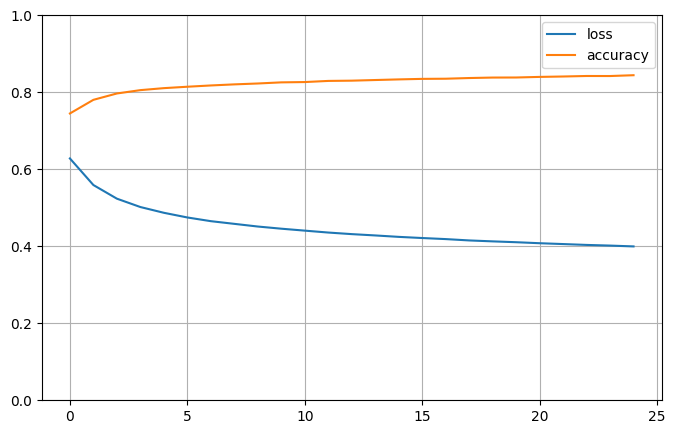

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [10]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.3991 - accuracy: 0.8437
test loss, test acc: [0.3990943431854248, 0.8436899781227112]


In [11]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[6 0 0 ... 9 9 9]
6


In [12]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9453     0     0     0     0     0   547     0     0     0]
 [    2  7155  1332     2   303  1186     0     0    20     0]
 [    2  2375  6610     4   495   497     0     0    17     0]
 [    3     0    36  9957     0     3     0     0     0     1]
 [    1   251   226     6  7807  1139     1     0   568     1]
 [    3  1655   313     3  1876  6095     0     0    55     0]
 [  824     0     0     0     0     0  9176     0     0     0]
 [    1     0     0     2     0     0     1  9995     1     0]
 [    1    14     8     5  1810    41     0     0  8121     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     10000
         1.0       0.62      0.72      0.67     10000
         2.0       0.78      0.66      0.71     10000
         3.0       1.00      1.00      1.00     10000
         4.0       0.64      0.78      0.70     10000
         5.0       0.68      0.61      0.64 

iPhone13_II model to iPhone13_I dataset

In [13]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [14]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [15]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [16]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.6371 - accuracy: 0.4949
Epoch 2/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6686 - accuracy: 0.7166
Epoch 3/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5812 - accuracy: 0.7569
Epoch 4/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5496 - accuracy: 0.7712
Epoch 5/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5318 - accuracy: 0.7791
Epoch 6/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5202 - accuracy: 0.7836
Epoch 7/25
3125/3125 [==============================] - 17s 5ms/step - loss: 0.5114 - accuracy: 0.7877
Epoch 8/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.5047 - accuracy: 0.7897
Epoch 9/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.4999 - accuracy: 0.7932
Epoch 10/25
3125/3125 [==============================] - 14s 4ms/step - l

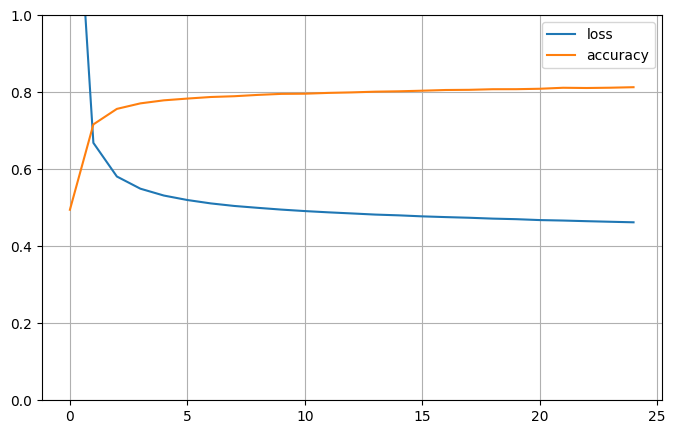

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.4606 - accuracy: 0.8146
test loss, test acc: [0.4605696201324463, 0.8145800232887268]


In [19]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[0 0 0 ... 9 9 9]
0


In [20]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 7994     0     0     0     0     0  2006     0     0     0]
 [    2  5522  1895     2  1603   958     0     0    18     0]
 [    2  1364  8057     5   396   159     0     0    17     0]
 [    1     1     6  9990     1     0     1     0     0     0]
 [    1  1095   419     3  6928  1265     0     0   289     0]
 [    3  1101   374     2  2817  5136     0     0   567     0]
 [ 1475     0     0     0     0     0  8525     0     0     0]
 [    1     0     1     0     0     1     0  9996     1     0]
 [    1     2    28     0   120   539     0     0  9310     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82     10000
         1.0       0.61      0.55      0.58     10000
         2.0       0.75      0.81      0.78     10000
         3.0       1.00      1.00      1.00     10000
         4.0       0.58      0.69      0.63     10000
         5.0       0.64      0.51      0.57 

iPhone13_III model to iPhone13_I dataset

In [21]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [22]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [23]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [24]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 14s 4ms/step - loss: 2.0137 - accuracy: 0.2749
Epoch 2/25
3125/3125 [==============================] - 13s 4ms/step - loss: 1.5476 - accuracy: 0.4967
Epoch 3/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.4080 - accuracy: 0.5746
Epoch 4/25
3125/3125 [==============================] - 15s 5ms/step - loss: 1.3081 - accuracy: 0.6059
Epoch 5/25
3125/3125 [==============================] - 14s 5ms/step - loss: 1.2309 - accuracy: 0.6239
Epoch 6/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1688 - accuracy: 0.6378
Epoch 7/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1181 - accuracy: 0.6486
Epoch 8/25
3125/3125 [==============================] - 14s 5ms/step - loss: 1.0764 - accuracy: 0.6582
Epoch 9/25
3125/3125 [==============================] - 14s 5ms/step - loss: 1.0411 - accuracy: 0.6642
Epoch 10/25
3125/3125 [==============================] - 14s 4ms/step - l

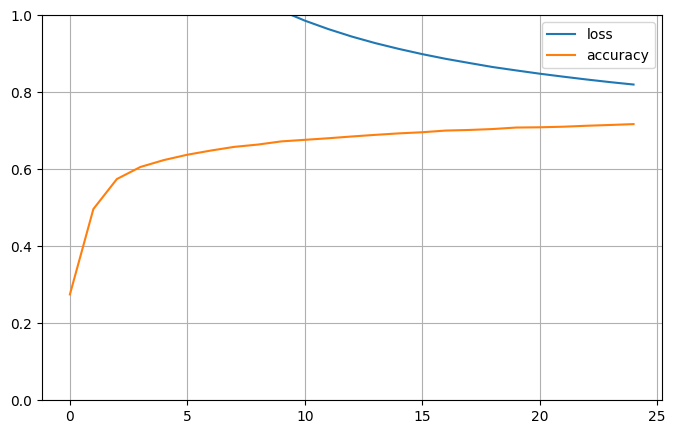

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.8210 - accuracy: 0.7000
test loss, test acc: [0.8209564089775085, 0.7000200152397156]


In [27]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[0 0 0 ... 9 9 9]
0


In [28]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9464     0     0     0     0     0   536     0     0     0]
 [    3   376  2374   154   580  5831    11     3   668     0]
 [    3    39  5540   604   737  2825    10     3   239     0]
 [    2     0    96  9880     8     4     8     2     0     0]
 [    3     7  1175   195  3891  3766     9    30   924     0]
 [    4    69  1204   109   883  6697     9    14  1011     0]
 [  288     8     2     0     0     2  9698     0     2     0]
 [    1     0     0     1     1     0    13  9981     3     0]
 [    1    11   221   109   989  4036    10   148  4475     0]
 [    0     0     0     0     0     0     0     0     0 10000]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     10000
         1.0       0.74      0.04      0.07     10000
         2.0       0.52      0.55      0.54     10000
         3.0       0.89      0.99      0.94     10000
         4.0       0.55      0.39      0.46     10000
         5.0       0.29      0.67      0.40 

Read iPhone13_II dataset

In [29]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.297562,0.233066,0.457479,0.204337,0.106389,0.209360,0.229010,0.232259,0.277606,0.365730,...,0.684227,0.830842,0.859823,0.410364,0.224956,0.292599,0.352029,0.210114,0.208219,0.0
2,1.000000,1.000000,1.000000,0.149414,0.635175,0.880382,0.488410,0.478789,0.854326,1.000000,...,0.167834,1.000000,0.447257,0.261568,0.384385,1.000000,0.473173,0.163629,0.074192,0.0
3,0.132538,0.228191,0.848126,1.000000,1.000000,1.000000,0.726369,0.338763,0.078774,0.456367,...,0.302293,0.443405,0.900594,1.000000,0.808641,0.569301,0.420698,0.188868,0.150457,0.0
4,0.427119,0.220546,0.568178,0.389744,0.191698,0.424645,1.000000,1.000000,1.000000,0.555668,...,1.000000,0.934328,1.000000,0.561862,0.085071,0.421608,0.799410,0.805795,0.651758,0.0
5,0.914260,0.132575,0.670569,0.419908,0.878314,0.452749,0.288505,0.750649,0.332200,0.278570,...,0.789007,0.983066,0.918889,0.810478,1.000000,0.398669,1.000000,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.945611,0.911776,0.004651,0.095358,0.127845,0.056760,0.074933,0.164572,0.204945,0.225184,...,0.039545,0.213280,0.222680,0.240510,0.350115,0.153002,0.121078,0.108132,0.907721,9.0
99997,0.945107,0.902097,0.054984,0.052296,0.096186,0.316988,0.312775,0.284003,0.402535,0.150490,...,0.428464,0.361175,0.374063,0.198039,0.236810,0.201250,0.047031,0.087383,0.941060,9.0
99998,0.918672,0.875337,0.100129,0.268197,0.073969,0.219161,0.327708,0.249369,0.056085,0.195662,...,0.300324,0.210309,0.029482,0.217746,0.198687,0.170925,0.153327,0.018015,0.882255,9.0
99999,0.941268,0.884760,0.039909,0.054803,0.125151,0.100740,0.047902,0.176813,0.383219,0.224704,...,0.277375,0.042647,0.262912,0.388251,0.355299,0.219967,0.111637,0.044845,0.912748,9.0


In [30]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

iPhone13_I model to iPhone13_II dataset

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")
model.summary()

2022-10-28 10:44:58.096455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [6]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [7]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3574 - accuracy: 0.6488
Epoch 2/25
3125/3125 [==============================] - 10s 3ms/step - loss: 0.3800 - accuracy: 0.9025
Epoch 3/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.3135 - accuracy: 0.9214
Epoch 4/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.2811 - accuracy: 0.9295
Epoch 5/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2609 - accuracy: 0.9340
Epoch 6/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.2466 - accuracy: 0.9372
Epoch 7/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.2360 - accuracy: 0.9398
Epoch 8/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2273 - accuracy: 0.9421
Epoch 9/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.2204 - accuracy: 0.9435
Epoch 10/25
3125/3125 [==============================] - 11s 3ms/step - l

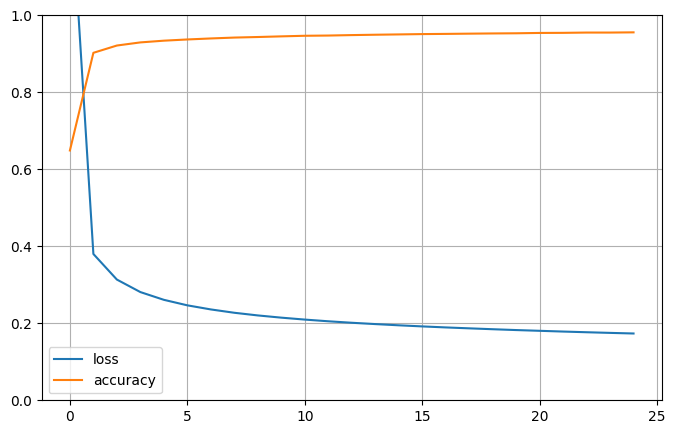

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [9]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.1721 - accuracy: 0.9559
test loss, test acc: [0.1720663458108902, 0.9559199810028076]


In [10]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[4 4 4 ... 9 9 9]
4


In [11]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[9994    0    0    0    5    0    0    0    0    1]
 [   0 9645    0  205    1   77    0   69    3    0]
 [   0    1 9826    1    2   92   76    1    0    1]
 [   0  182    0 8904    0   23    0  890    1    0]
 [   0    0    0    0 9975    0    0    0    3   22]
 [   0   99  173   17    1 9582  122    5    1    0]
 [   0    9   52    0    2  165 9761    0    8    3]
 [   0   89    0  893   27    4    0 8986    1    0]
 [   0    0    0    0    7    0    1    0 9532  460]
 [   0    0    0    0    5    0   21    0  587 9387]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10000
         1.0       0.96      0.96      0.96     10000
         2.0       0.98      0.98      0.98     10000
         3.0       0.89      0.89      0.89     10000
         4.0       1.00      1.00      1.00     10000
         5.0       0.96      0.96      0.96     10000
         6.0       0.98      0.98      0.98     10000
         7.0       0.90      0.90   

iPhone13_I_BeSh model to iPhone13_II dataset

In [31]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [32]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [33]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [34]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0996 - accuracy: 0.7192
Epoch 2/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.3546 - accuracy: 0.9541
Epoch 3/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.2835 - accuracy: 0.9673
Epoch 4/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.2483 - accuracy: 0.9716
Epoch 5/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.2255 - accuracy: 0.9743
Epoch 6/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.2091 - accuracy: 0.9759
Epoch 7/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.1963 - accuracy: 0.9773
Epoch 8/25
3125/3125 [==============================] - 11s 3ms/step - loss: 0.1857 - accuracy: 0.9780
Epoch 9/25
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1769 - accuracy: 0.9787
Epoch 10/25
3125/3125 [==============================] - 12s 4ms/step - l

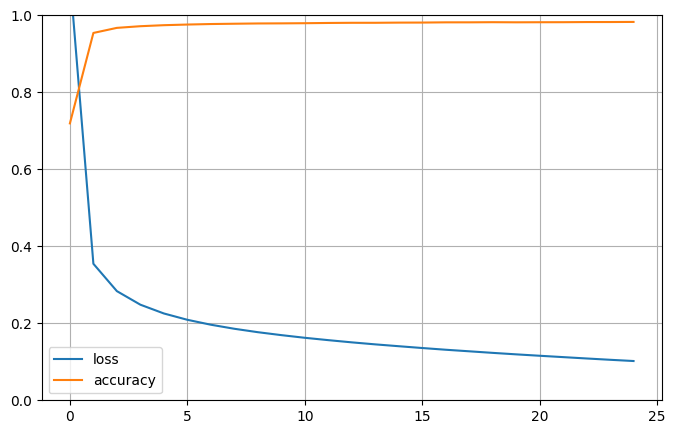

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [36]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.1010 - accuracy: 0.9828
test loss, test acc: [0.1009572297334671, 0.9827799797058105]


In [37]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[4 4 4 ... 9 9 9]
4


In [38]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9995     0     0     0     5     0     0     0     0     0]
 [    0  9725     4     1     1   227    29     8     3     2]
 [    0     1  9855     1     2    34    27    79     0     1]
 [    0    14     0  9949     0    15     1    19     1     1]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0   546    68    33     0  9295    43    11     2     2]
 [    0    61    42     1     2    34  9858     0     1     1]
 [   14     5   236    16     3     7     2  9715     0     2]
 [    0     0     0     0     4     0     0     0  9923    73]
 [    0     0     0     0     3     0     0     0    34  9963]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10000
         1.0       0.94      0.97      0.96     10000
         2.0       0.97      0.99      0.98     10000
         3.0       0.99      0.99      0.99     10000
         4.0       1.00      1.00      1.00     10000
         5.0       0.97      0.93      0.95 

iPhone13_III model to iPhone13_II dataset

In [12]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [13]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [14]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [15]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 14s 4ms/step - loss: 2.1003 - accuracy: 0.3044
Epoch 2/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.3245 - accuracy: 0.6130
Epoch 3/25
3125/3125 [==============================] - 16s 5ms/step - loss: 1.1280 - accuracy: 0.7058
Epoch 4/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0157 - accuracy: 0.7533
Epoch 5/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.9385 - accuracy: 0.7799
Epoch 6/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.8813 - accuracy: 0.7976
Epoch 7/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8363 - accuracy: 0.8104
Epoch 8/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7996 - accuracy: 0.8206
Epoch 9/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7685 - accuracy: 0.8286
Epoch 10/25
3125/3125 [==============================] - 14s 4ms/step - l

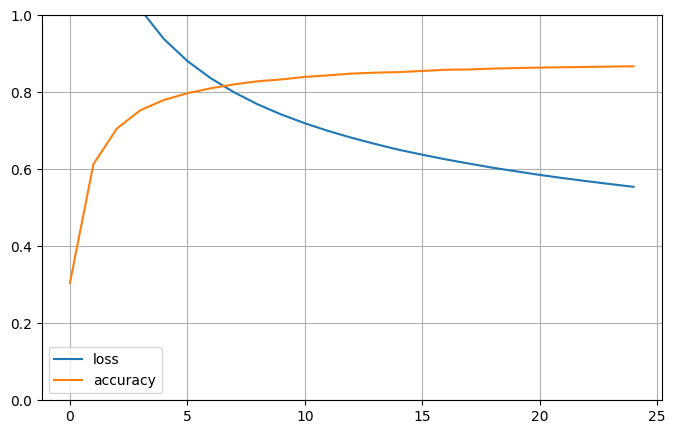

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.5509 - accuracy: 0.8669
test loss, test acc: [0.5509257316589355, 0.866919994354248]


In [18]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[0 4 0 ... 9 9 9]
0


In [19]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[9998    0    0    0    2    0    0    0    0    0]
 [   1 6759  162  619    2 1068  159 1215   15    0]
 [   0    0 9191    0    3  116  557  124    9    0]
 [   1   13    0 9399    2  402    0  169   14    0]
 [   1    0    0    0 9975    0    0    0   21    3]
 [   0  255  477  611    2 7133  200 1307   14    1]
 [   0    0 1165    0    3  103 8715    0   13    1]
 [  26  328  606  567    1 2145   16 6286   25    0]
 [   3   14    0    0    6    0    0    2 9509  466]
 [   1    0    0    0    3    0    3    1  265 9727]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10000
         1.0       0.92      0.68      0.78     10000
         2.0       0.79      0.92      0.85     10000
         3.0       0.84      0.94      0.89     10000
         4.0       1.00      1.00      1.00     10000
         5.0       0.65      0.71      0.68     10000
         6.0       0.90      0.87      0.89     10000
         7.0       0.69      0.63   

Read iPhone13_III dataset

In [39]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_III.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.422498,0.680489,1.000000,1.000000,1.000000,1.000000,1.000000,0.834423,0.834500,0.718599,...,0.750746,0.763691,0.706715,0.702801,1.000000,1.000000,1.000000,1.000000,0.688021,0.0
2,0.929037,0.853783,0.101921,0.103562,0.092609,0.162482,0.193398,0.074014,0.108654,0.290425,...,0.207853,0.345914,0.340843,0.318369,0.532507,0.323057,0.264786,0.069383,0.906716,0.0
3,0.941623,0.896120,0.060363,0.109833,0.152149,0.140870,0.167666,0.195334,0.330166,0.157229,...,0.330707,0.094808,0.053913,0.247789,0.299523,0.174564,0.114524,0.098097,0.941664,0.0
4,0.815995,0.778228,0.082594,0.182406,0.182273,0.151699,0.245746,0.440105,0.395093,0.148037,...,0.165981,0.312658,0.384464,0.321797,0.246556,0.108866,0.058167,0.007849,0.759296,0.0
5,0.795723,0.751092,0.066276,0.093429,0.039035,0.196214,0.303661,0.279657,0.039834,0.135989,...,0.148099,0.200362,0.209867,0.665128,0.608885,0.243823,0.126856,0.012633,0.760249,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.933560,0.919221,0.047033,0.261235,0.279359,0.195774,0.183475,0.283673,0.361993,0.348998,...,0.460885,0.377014,0.408991,0.570479,0.268484,0.204830,0.133601,0.076476,0.872792,9.0
99997,0.934426,0.901555,0.070696,0.132777,0.059176,0.141208,0.211734,0.377847,0.519662,0.149129,...,0.460394,0.466287,0.498449,0.352417,0.317433,0.098610,0.067554,0.084241,0.933651,9.0
99998,0.931663,0.928754,0.052643,0.049096,0.182915,0.404265,0.275208,0.169362,0.230368,0.422917,...,0.209413,0.551867,0.383992,0.296554,0.436850,0.254137,0.051285,0.090958,0.899035,9.0
99999,0.931983,0.908526,0.003918,0.074554,0.328282,0.291110,0.172624,0.133035,0.114316,0.128454,...,0.231542,0.236621,0.260887,0.375407,0.268695,0.193573,0.293027,0.146010,0.887647,9.0


In [40]:
Y = labels = data['labels']
X = data = data.drop(columns=['labels'])

iPhone13_I model to iPhone13_III dataset

In [41]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [42]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [43]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [44]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 13s 4ms/step - loss: 1.9160 - accuracy: 0.2938
Epoch 2/25
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3491 - accuracy: 0.4531
Epoch 3/25
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2026 - accuracy: 0.5408
Epoch 4/25
3125/3125 [==============================] - 11s 3ms/step - loss: 1.1226 - accuracy: 0.5796
Epoch 5/25
3125/3125 [==============================] - 11s 4ms/step - loss: 1.0701 - accuracy: 0.6020
Epoch 6/25
3125/3125 [==============================] - 11s 3ms/step - loss: 1.0318 - accuracy: 0.6173
Epoch 7/25
3125/3125 [==============================] - 11s 3ms/step - loss: 1.0036 - accuracy: 0.6277
Epoch 8/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.9799 - accuracy: 0.6331
Epoch 9/25
3125/3125 [==============================] - 11s 4ms/step - loss: 0.9600 - accuracy: 0.6392
Epoch 10/25
3125/3125 [==============================] - 12s 4ms/step - l

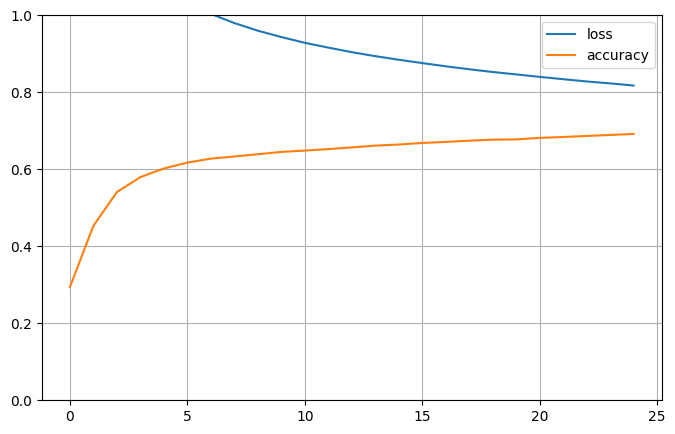

In [45]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [46]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.8101 - accuracy: 0.7034
test loss, test acc: [0.8100899457931519, 0.7034000158309937]


In [47]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[0 0 0 ... 9 9 9]
0


In [48]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[8246 1272   79    5  127    0    0    0    0  271]
 [1830 7248  150   17  282    0    1    0    0  472]
 [  73   49 6950 1629  911    3   27    0    0  358]
 [  67   54 3516 4337 1354    2   18    0    0  652]
 [ 467  486 1123 1215 3975    0    1    0    0 2733]
 [   0    0   26   31    0 8341  995  575   27    5]
 [  19    6   11    8    1  824 7927 1169   35    0]
 [   0    0    0    0    0  604 1381 7682  333    0]
 [  25    0    0    1    0   55    8  419 9492    0]
 [ 459  539  247  440 2172    0    1    0    0 6142]]
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78     10000
         1.0       0.75      0.72      0.74     10000
         2.0       0.57      0.69      0.63     10000
         3.0       0.56      0.43      0.49     10000
         4.0       0.45      0.40      0.42     10000
         5.0       0.85      0.83      0.84     10000
         6.0       0.77      0.79      0.78     10000
         7.0       0.78      0.77   

iPhone13_I_BeSh model to iPhone13_III dataset

In [49]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [50]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [51]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [52]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.7458 - accuracy: 0.4374
Epoch 2/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9364 - accuracy: 0.6150
Epoch 3/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8446 - accuracy: 0.6486
Epoch 4/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7919 - accuracy: 0.6703
Epoch 5/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7571 - accuracy: 0.6855
Epoch 6/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7308 - accuracy: 0.6988
Epoch 7/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7096 - accuracy: 0.7076
Epoch 8/25
3125/3125 [==============================] - 16s 5ms/step - loss: 0.6915 - accuracy: 0.7166
Epoch 9/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.6767 - accuracy: 0.7216
Epoch 10/25
3125/3125 [==============================] - 14s 4ms/step - l

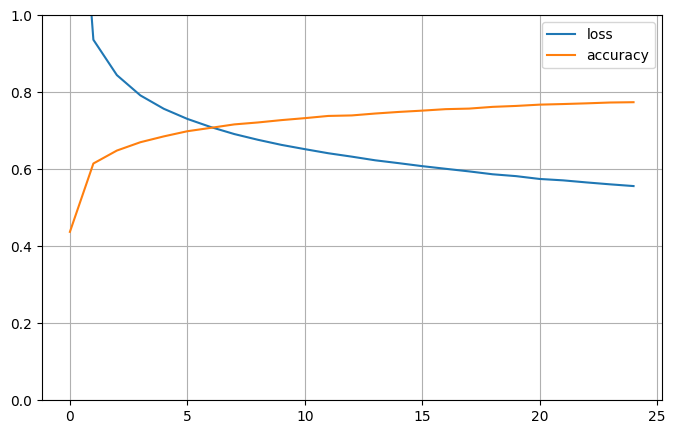

In [53]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [54]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.5367 - accuracy: 0.7945
test loss, test acc: [0.5366602540016174, 0.7944999933242798]


In [55]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[9 0 0 ... 9 4 9]
9


In [56]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[7612 2190    0    5   32    0    0    0    0  161]
 [1301 8107    1    2  206    0    0    0    0  383]
 [  11    2 5855 3816  296    0    0    0    0   20]
 [   7    5 1511 7812  523    0    0    0    0  142]
 [  37  515   16  734 5426    0    0    0    0 3272]
 [   0    0    5    4    1 9533  152  303    2    0]
 [  22    4    6    0    0  255 9011  702    0    0]
 [   0    0    0    0    0  278  602 8861  259    0]
 [  25    0    1    0    0    9    4  144 9817    0]
 [ 165  734    1  257 1427    0    0    0    0 7416]]
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79     10000
         1.0       0.70      0.81      0.75     10000
         2.0       0.79      0.59      0.67     10000
         3.0       0.62      0.78      0.69     10000
         4.0       0.69      0.54      0.61     10000
         5.0       0.95      0.95      0.95     10000
         6.0       0.92      0.90      0.91     10000
         7.0       0.89      0.89   

iPhone13_II model to iPhone13_III dataset

In [57]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [58]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [59]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [60]:
history = model.fit(X, Y, epochs=25)

Epoch 1/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.8837 - accuracy: 0.3725
Epoch 2/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.1588 - accuracy: 0.5901
Epoch 3/25
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0435 - accuracy: 0.6312
Epoch 4/25
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9810 - accuracy: 0.6521
Epoch 5/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9374 - accuracy: 0.6657
Epoch 6/25
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9045 - accuracy: 0.6743
Epoch 7/25
3125/3125 [==============================] - 15s 5ms/step - loss: 0.8772 - accuracy: 0.6852
Epoch 8/25
3125/3125 [==============================] - 18s 6ms/step - loss: 0.8548 - accuracy: 0.6911
Epoch 9/25
3125/3125 [==============================] - 14s 5ms/step - loss: 0.8347 - accuracy: 0.6991
Epoch 10/25
3125/3125 [==============================] - 13s 4ms/step - l

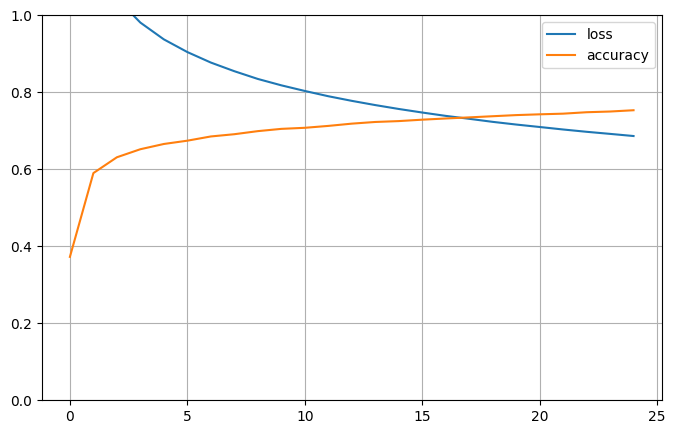

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [62]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.6804 - accuracy: 0.7561
test loss, test acc: [0.6803941130638123, 0.7561200261116028]


In [64]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[1 0 0 ... 4 3 9]
1


In [65]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[9039  777    8   16  142    0    0    0    0   18]
 [1295 8356    7    1  104    0    0    0    0  237]
 [ 116   78 6058 2398 1267   21    8    0    0   54]
 [ 108  131 2646 5103 1927    7    4    1    0   73]
 [ 197  202  518  861 7264    4    2    0    0  952]
 [   0    0    9   30    2 9032  636  199   89    3]
 [  26    1   63    9    1  522 8742  597   39    0]
 [   0    0    0    3    0  156  577 8770  494    0]
 [  25    0    1    1    0  108   10  623 9232    0]
 [ 314  482  702  481 4002    2    1    0    0 4016]]
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86     10000
         1.0       0.83      0.84      0.83     10000
         2.0       0.61      0.61      0.61     10000
         3.0       0.57      0.51      0.54     10000
         4.0       0.49      0.73      0.59     10000
         5.0       0.92      0.90      0.91     10000
         6.0       0.88      0.87      0.88     10000
         7.0       0.86      0.88   